
<font size="5">Heart Disease Prediction</font>



In [69]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# We will use Random Forest as it performed well in your previous notebook
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


<font size="4">Importing Dataset</font>

In [71]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [72]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

try:
    df = pd.read_csv(data_url, names=column_names, na_values='?')
    print("Data loaded successfully.")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except Exception as e:
    print(f"Error loading data: {e}.")

Data loaded successfully.

First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


<font size="4">Dataset Information
</font>

In [74]:
df.info()
df.dropna(inplace=True)
print(f"\nMissing data rows dropped. New shape: {df.shape}")
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("\nHeart Disease vs. No Heart Disease count:")
print(df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Missing data rows dropped. New shape: (297, 14)

Heart Disease vs. No Heart Disease count:
target
0    160
1    137
Name: count, dtype: int64


<font size="4">Data Visualization</font>

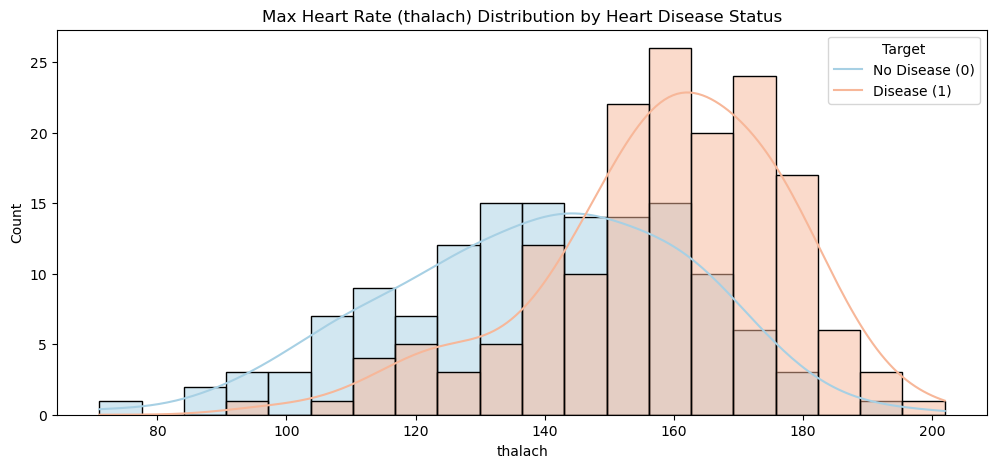

In [76]:
plt.figure(figsize=(12, 5))

# Distribution of Max Heart Rate (thalach) by Disease Presence
sns.histplot(data=df, x='thalach', hue='target', kde=True, bins=20, palette='RdBu', common_norm=False)
plt.title('Max Heart Rate (thalach) Distribution by Heart Disease Status')
plt.legend(labels=['No Disease (0)', 'Disease (1)'], title='Target')
plt.show()


<font size="4">Standarization
</font>

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print("Features scaled successfully. Sample scaled data:")
print(X_train_scaled_df.head())


Features scaled successfully. Sample scaled data:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.085668  0.693722  0.853348 -0.462582  0.312737 -0.450606  1.023523   
1 -0.973247  0.693722 -1.242439 -1.749078 -0.987921  2.219234 -0.989547   
2 -1.306090  0.693722 -0.194546 -0.126974  1.236393 -0.450606 -0.989547   
3 -0.862300  0.693722 -0.194546  0.320503  0.143086 -0.450606  1.023523   
4  0.358121  0.693722  0.853348  0.991719  0.388137 -0.450606  1.023523   

    thalach     exang   oldpeak     slope        ca      thal  
0 -1.827448  1.374861  0.967117  0.672972  0.349404  1.131548  
1  0.275439 -0.727346 -0.901878 -0.954521 -0.740185  1.131548  
2  0.543892 -0.727346  0.712254 -0.954521  0.349404 -0.931351  
3  0.275439 -0.727346 -0.901878 -0.954521 -0.740185 -0.931351  
4 -1.737964  1.374861 -0.222243 -0.954521 -0.740185  1.131548  


<font size="4">Model Training
</font>

In [80]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

print("Random Forest Classifier model trained successfully.")



Random Forest Classifier model trained successfully.


<font size="4">Prediction</font>

Model Accuracy on Test Set: 86.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



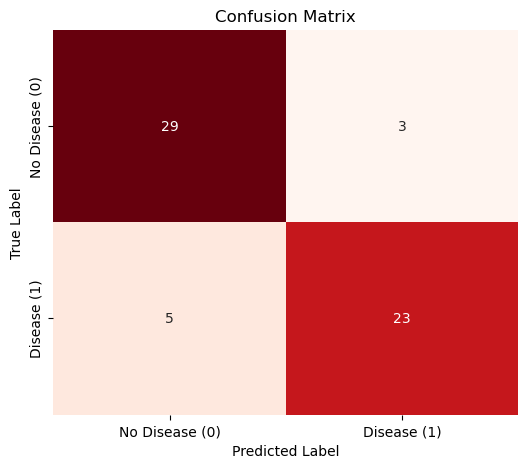

In [82]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()